<a href="https://colab.research.google.com/github/Moly-malibu/AgroEdit/blob/master/Agribusiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agriculture Crop Production by Countries: Vegetales & Fruits

#DasetSet, URL: https://data.world/agriculture/crop-production.

#Data From: Food and Agriculture Organization of the United Nations (FAO)


#IDEA:   

The objective is to show the performance of the banana industry from 1961 to 2014. The forecasts showed that the banana industry would not be more successful, predicting that it would be better to abandon this type of business, but scientific advances have helped bananas not disappear from the Basic family basket, despite the fact that for more than 60 decades it has had the slowest growth in agribusiness.

#Target to be Predicted:  Bananas Yield in the Year 1961 to 2014.

In [2]:
#install Category Encoder and Profiling Report
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 153kB 2.6MB/s 
     |████████████████████████████████| 614kB 8.5MB/s 
     |████████████████████████████████| 235kB 15.4MB/s 
     |████████████████████████████████| 307kB 14.2MB/s 
     |████████████████████████████████| 215kB 17.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 747kB 18.6MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.4.0-py2.py3-none-any.whl size=195588 sha256=2ca1123adbce0e98624c6c2ae4ec42c68a3f51b043258fd93011aec1b491b101
  Stored in directory: /root/.cache/pip/wheels/b2/4b/40/ff4633a59f4e7fbdfec19b8e10e353b54b5eef125c31afe51a
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=17487 sha256=f2af4d353d9083afb3ba01a0c811af761cdbb148b130d3bd38c8032b2e4d47ac
  Stored in directory: /root/.cache/pip/wheels/b0/b2/96/2074eee7dbf7

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 57.7MB 69kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=481f98cf83556fbc7d924e0f0f645daf279aba94b0cd93b929da38ac3f1c06dd
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383177 sha256=f344caa0bd78110ff50265fe01ae02a32437927089da75bb8cf165df1bd2ff6f
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


#Load DataSet

In [0]:
#Load the DataSet
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Moly-malibu/AgroEdit/master/agriculture-crop-production%20(11).csv').drop(['Unnamed: 0'], axis=1)

#General Information DataSet

#Report

In [0]:
#import pandas_profiling
#df.profile_report()

In [0]:
#Dimension DataSet
df.shape

(11700, 58)

In [0]:
#Statistics Report DataSet
df.describe()

,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
count,11700.000000,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04,1.170000e+04
mean,0.614359,4.402188e+05,4.538964e+05,4.658530e+05,4.679034e+05,4.771856e+05,4.890134e+05,5.099094e+05,5.138479e+05,5.196507e+05,5.227487e+05,5.511230e+05,5.413063e+05,5.645618e+05,5.628230e+05,5.844043e+05,5.917097e+05,6.030503e+05,6.333849e+05,6.394678e+05,6.370529e+05,6.642786e+05,6.774142e+05,6.517197e+05,7.002837e+05,7.134008e+05,7.148556e+05,7.046577e+05,6.993256e+05,7.369157e+05,7.539348e+05,7.530037e+05,7.771591e+05,7.695754e+05,8.020771e+05,8.024159e+05,8.544189e+05,8.572682e+05,8.779627e+05,8.885085e+05,9.005001e+05,9.094610e+05,9.016891e+05,9.371578e+05,9.833480e+05,9.875418e+05,9.874323e+05,1.030372e+06,1.069322e+06,1.065942e+06,1.091391e+06,1.114175e+06,1.125975e+06,1.177177e+06,1.199285e+06
std,0.800888,4.024494e+06,4.093776e+06,4.290905e+06,4.223920e+06,4.475827e+06,4.626404e+06,4.945063e+06,4.892302e+06,4.965576e+06,4.978827e+06,5.550811e+06,5.376200e+06,5.731999e+06,5.417167e+06,5.959022e+06,6.075259e+06,6.212670e+06,6.645732e+06,6.943982e+06,6.587548e+06,7.185658e+06,7.410825e+06,6.629070e+06,7.681083e+06,7.827847e+06,7.652814e+06,7.367898e+06,6.844732e+06,7.677102e+06,8.180710e+06,7.914149e+06,8.683428e+06,8.064568e+06,8.879778e+06,8.488809e+06,9.442400e+06,9.417297e+06,9.761004e+06,9.816071e+06,9.962515e+06,9.974643e+06,9.869124e+06,1.027354e+07,1.092994e+07,1.099631e+07,1.106158e+07,1.197356e+07,1.228394e+07,1.243137e+07,1.268159e+07,1.299255e+07,1.304381e+07,1.387497e+07,1.413081e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,5.882000e+03,6.063250e+03,6.169000e+03,6.250000e+03,6.344750e+03,6.368000e+03,6.600750e+03,6.604000e+03,6.717250e+03,6.618000e+03,6.932000e+03,6.878000e+03,6.782000e+03,7.079750e+03,7.109500e+03,7.089000e+03,7.079000e+03,7.202500e+03,7.099500e+03,7.332250e+03,7.425250e+03,7.472500e+03,7.450500e+03,7.715750e+03,8.048250e+03,8.196250e+03,8.180250e+03,8.333000e+03,8.286000e+03,8.378250e+03,8.412750e+03,8.233750e+03,8.522750e+03,8.451500e+03,8.543000e+03,8.981500e+03,8.941000e+03,9.000000e+03,9.155250e+03,9.060750e+03,9.351000e+03,9.283250e+03,9.534500e+03,9.585500e+03,9.746750e+03,9.845500e+03,9.691250e+03,9.957750e+03,1.000000e+04,1.017150e+04,1.016925e+04,1.016425e+04,1.035950e+04,1.015675e+04
50%,0.000000,2.857100e+04,2.901600e+04,2.938900e+04,3.000000e+04,3.003050e+04,3.05000

In [0]:
#Object in DataSet
df.head()

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
0,Albania,Barley,0,hg/ha,10224.0,8405.0,8770.0,10258.0,9865.0,12000.0,9905.0,8144.0,8333.0,10778.0,8333.0,9059.0,10112.0,10000.0,9804.0,14286.0,16364.0,18182.0,19167.0,20833.0,20833.0,20992.0,23077.0,23077.0,23077.0,27692.0,29231.0,30769.0,30303.0,10000.0,9231.0,13802.0,13324.0,23523.0,22527.0,13379.0,14573.0,19106.0,18125.0,15000.0,25000.0,47500.0,18710.0,24667.0,27297.0,27586.0,25000.0,25714.0,26471.0,29200.0,30634.0,28000.0,27880.0,27007.0
1,Albania,"Beans, dry",0,hg/ha,7059.0,7031.0,7008.0,6989.0,6966.0,7001.0,7038.0,6999.0,6985.0,7022.0,7266.0,7059.0,7971.0,8012.0,8000.0,8011.0,8010.0,8019.0,8043.0,8000.0,8696.0,9524.0,9500.0,9474.0,9412.0,11667.0,7826.0,7500.0,10000.0,6364.0,8133.0,12286.0,11676.0,8966.0,9011.0,10665.0,9486.0,10848.0,11404.0,11200.0,11946.0,14080.0,10230.0,13023.0,14658.0,16118.0,14247.0,15245.0,16429.0,17518.0,17569.0,18493.0,19718.0,20548.0
2,Albania,Grapes,0,hg/ha,42561.0,43964.0,16941.0,30895.0,34048.0,42937.0,38800.0,45873.0,47381.0,52598.0,44068.0,49565.0,51695.0,47692.0,45714.0,45270.0,41026.0,43636.0,38596.0,39157.0,39494.0,44389.0,43158.0,36842.0,42147.0,33194.0,39727.0,38807.0,41517.0,64518.0,42166.0,61037.0,65235.0,96810.0,127805.0,136053.0,163713.0,158679.0,130928.0,171905.0,174457.0,159746.0,183766.0,152577.0,173422.0,184816.0,195411.0,190919.0,190811.0,214253.0,215049.0,210526.0,212966.0,211636.0
3,Albania,Maize,0,hg/ha,9541.0,9079.0,11924.0,11634.0,10509.0,15051.0,17241.0,18782.0,19485.0,20718.0,19443.0,19667.0,20000.0,21981.0,27000.0,31111.0,37647.0,39535.0,37500.0,26504.0,31585.0,37252.0,42263.0,37209.0,35128.0,45065.0,38148.0,32871.0,47969.0,36613.0,29068.0,24876.0,24185.0,25848.0,31300.0,32604.0,31862.0,33416.0,37455.0,38811.0,38135.0,39460.0,42805.0,46197.0,45442.0,50111.0,46732.0,50000.0,55693.0,66790.0,59869.0,67290.0,69533.0,69091.0
4,Albania,Oats,0,hg/ha,6045.0,7735.0,5467.0,6878.0,6880.0,9500.0,10054.0,10000.0,10263.0,10263.0,10500.0,9500.0,10628.0,12207.0,12676.0,12857.0,13333.0,14000.0,14000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,10000.0,7500.0,7500.0,9404.0,12252.0,17354.0,12090.0,12089.0,11713.0,15962.0,13200.0,14673.0,14299.0,16555.0,14803.0,18189.0,17381.0,16897.0,16212.0,15683.0,19231.0,19500.0,23107.0,21600.0,19853.0,21317.0


In [0]:
#Columns Names
df.columns.values

array(['Area', 'Item', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970',
       'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984',
       'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998',
       'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014'], dtype=object)

In [0]:
#Element in a list and returns its position
df.set_index(['Area', 'Item', 'Element', 'Unit']).count(level='Item')

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
Item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agave fibres nes,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
"Almonds, with shell",15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
"Anise, badian, fennel, coriander",18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Apples,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Apricots,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Walnuts, with shell",12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Watermelons,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Wheat,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85


#Target Distributed

In [0]:
import numpy as np

np.nan >= 4  # Missing values would falsely give us falses!

False

In [0]:
#Statistic Describe Targe 'Item
#overall check
df['Item'].describe() #the quickie overall check

count                        11700
unique                         176
top       Vegetables&Melons, Total
freq                           518
Name: Item, dtype: object

In [0]:
y = df['Item']
y.nunique()

176

In [0]:
#Binary Classification: if the classes are imbalanced
y.value_counts(normalize=True)

Vegetables&Melons, Total    0.044274
Vegetables Primary          0.044274
Roots and Tubers,Total      0.043248
Fruit excl Melons,Total     0.043162
Oilcrops Primary            0.040342
                              ...   
Brazil nuts, with shell     0.000171
Tallowtree seed             0.000085
Peppermint                  0.000085
Gums, natural               0.000085
Mat�                        0.000085
Name: Item, Length: 176, dtype: float64

#Explore and Clean Data

In [0]:
#Kinds of Area

df['Item'].unique()

array(['Barley', 'Beans, dry', 'Grapes', 'Maize', 'Oats', 'Olives',
       'Potatoes', 'Pulses, nes', 'Rye', 'Seed cotton', 'Sugar beet',
       'Sunflower seed', 'Tobacco, unmanufactured', 'Tomatoes', 'Vetches',
       'Wheat', 'Cereals (Rice Milled Eqv)', 'Cereals,Total',
       'Citrus Fruit,Total', 'Coarse Grain, Total', 'Fibre Crops Primary',
       'Fruit excl Melons,Total', 'Oilcakes Equivalent',
       'Oilcrops Primary', 'Pulses,Total', 'Roots and Tubers,Total',
       'Treenuts,Total', 'Vegetables Primary', 'Vegetables&Melons, Total',
       'Asparagus', 'Beans, green', 'Berries nes',
       'Broad beans, horse beans, dry', 'Cabbages and other brassicas',
       'Carrots and turnips', 'Chillies and peppers, green',
       'Cucumbers and gherkins', 'Grain, mixed', 'Hops',
       'Lettuce and chicory', 'Oilseeds nes', 'Onions, dry', 'Peas, dry',
       'Peas, green', 'Poppy seed', 'Rapeseed', 'Spinach', 'Strawberries',
       'Vegetables, fresh nes', 'Apples', 'Apricots',
     

In [0]:
#See what is the most popular product
df['Item'].value_counts().nlargest(100)

Vegetables&Melons, Total    518
Vegetables Primary          518
Roots and Tubers,Total      506
Fruit excl Melons,Total     505
Oilcrops Primary            472
                           ... 
Figs                         26
Rapeseed                     26
Cow peas, dry                24
Sisal                        24
Bastfibres, other            22
Name: Item, Length: 100, dtype: int64

In [0]:
#Combine element categories to make this more useful

df['Item'] = df['Item'].str.lower()

blueberries = df['Item'].str.contains('blueberries')
gums = df['Item'].str.contains('gums')
peppermint = df['Item'].str.contains('peppermint')
tallowtree = df['Item'].str.contains('tallowtree')
roots = df['Item'].str.contains('roots')
vegetablesmelons = df['Item'].str.contains('vegetablesmelons')
vegetables = df['Item'].str.contains('vegetables')
kola = df['Item'].str.contains('kola')
nuts = df['Item'].str.contains('nuts')
melons = df['Item'].str.contains('melons')
cereals = df['Item'].str.contains('cereals')
bananas = df['Item'].str.contains('bananas')

df.loc[vegetables, 'Item'] = 'vegetables'
df.loc[roots, 'Item'] = 'roots'
df.loc[kola, 'Item'] = 'kola'
df.loc[nuts, 'Item'] = 'nuts'
df.loc[melons, 'Item'] = 'melons' 
df.loc[cereals, 'Item'] = 'cereals'
df.loc[bananas, 'Item'] = 'bananas'

df.loc[~blueberries & ~gums & ~roots & ~kola & ~nuts & ~melons & ~cereals &
       ~peppermint & ~tallowtree & ~vegetables & ~vegetablesmelons & ~bananas, 'Item'] = 'Other'

In [0]:
df['Item'].value_counts()

Other              7545
melons             1170
cereals             911
vegetables          845
roots               596
nuts                501
bananas             127
blueberries           2
peppermint            1
tallowtree seed       1
gums, natural         1
Name: Item, dtype: int64

In [0]:
#Quick hack to fix missing
df = df.fillna('Missing')

#Baselines for Clasificaton: Target, Features, & split

In [0]:
#Load CSV Dataset Clean, Create Prior, table to read

import csv
import numpy
import pandas as pd

test = pd.read_csv('https://raw.githubusercontent.com/Moly-malibu/AgroEdit/master/agriculture-crop-production%20(11).csv').drop(['Unnamed: 0'], axis=1)
val = pd.read_csv('https://raw.githubusercontent.com/Moly-malibu/AgroEdit/master/agriculture-crop-production%20(11).csv').drop(['Unnamed: 0'], axis=1) 
train = pd.read_csv('https://raw.githubusercontent.com/Moly-malibu/AgroEdit/master/agriculture-crop-production%20(11).csv').drop(['Unnamed: 0'], axis=1)

train['Item'].mode()   

0          Vegetables Primary
1    Vegetables&Melons, Total
dtype: object

In [0]:
train.describe(exclude='number')

,Area,Item,Unit
count,11700,11700,11700
unique,180,176,3
top,"China, mainland","Vegetables&Melons, Total",hg/ha
freq,188,518,6878


In [0]:
val['Item'].value_counts()

Vegetables&Melons, Total    518
Vegetables Primary          518
Roots and Tubers,Total      506
Fruit excl Melons,Total     505
Oilcrops Primary            472
                           ... 
Brazil nuts, with shell       2
Tallowtree seed               1
Peppermint                    1
Gums, natural                 1
Mat�                          1
Name: Item, Length: 176, dtype: int64

In [0]:
val[val.Item=='Bananas']

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014
479,Greece,Bananas,0,hg/ha,7856.0,8082.0,9033.0,9329.0,9320.0,9458.0,9891.0,9150.0,7967.0,8365.0,7740.0,7875.0,6655.0,6640.0,7545.0,9278.0,8449.0,9994.0,10288.0,12275.0,10660.0,10527.0,10637.0,13657.0,155195.0,180989.0,169550.0,199162.0,197660.0,187351.0,174297.0,187167.0,230500.0,221429.0,195324.0,184520.0,180160.0,176283.0,163708.0,164672.0,142876.0,168522.0,168391.0,176607.0,234132.0,215629.0,206092.0,211765.0,225843.0,222689.0,227246.0,196429.0,297247.0,413750.0
1033,Portugal,Bananas,0,hg/ha,321905.0,289773.0,301087.0,318447.0,320755.0,250014.0,246802.0,199713.0,262820.0,250000.0,240741.0,220000.0,220000.0,240000.0,225570.0,232020.0,255140.0,214717.0,191075.0,268064.0,266612.0,268000.0,276200.0,206339.0,216263.0,243542.0,302533.0,293824.0,386044.0,386825.0,338710.0,316667.0,306316.0,292983.0,280591.0,269316.0,259929.0,257619.0,264332.0,259556.0,255388.0,250247.0,248507.0,247508.0,247200.0,246154.0,250000.0,245552.0,239942.0,233310.0,227273.0,221951.0,209526.0,214800.0
1204,Spain,Bananas,0,hg/ha,331895.0,318125.0,355104.0,371633.0,376162.0,385100.0,355333.0,365648.0,400185.0,379009.0,319474.0,294609.0,350543.0,309070.0,286508.0,269680.0,322459.0,301654.0,300735.0,354627.0,363731.0,339701.0,347328.0,357722.0,349985.0,420179.0,423774.0,403061.0,421809.0,448502.0,408380.0,417821.0,403146.0,393956.0,438023.0,399524.0,478104.0,445112.0,408731.0,446941.0,458671.0,445291.0,416846.0,430387.0,361306.0,363451.0,374349.0,403904.0,386834.0,434999.0,378937.0,405075.0,395342.0,400074.0
1563,Bahrain,Bananas,1,ha,10.0,10.0,10.0,10.0,10.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,14.0,14.0,14.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,51.0,55.0,60.0,65.0,68.0,70.0,73.0,80.0,85.0,86.0,85.0,66.0,80.0,79.0,79.0,85.0,80.0,89.0,92.0,94.0,110.0,96.0,95.0,94.0,93.0,92.0,90.0,89.0,94.0
1564,Bahrain,Bananas,0,hg/ha,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,108333.0,108333.0,108333.0,108333.0,107143.0,107143.0,107143.0,111200.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,121569.0,118182.0,109167.0,107692.0,104412.0,102857.0,101370.0,95000.0,91765.0,93023.0,88235.0,90909.0,91250.0,92310.0,92263.0,91965.0,91722.0,91848.0,92202.0,92615.0,90909.0,95214.0,97023.0,98957.0,100984.0,103071.0,111111.0,106960.0,101942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372,Uganda,Bananas,0,hg/ha,40000.0,40000.0,40000.0,40000.0,40000.0,45106.0,45064.0,36895.0,40244.0,23298.0,25830.0,24019.0,31000.0,32000.0,33000.0,34000.0,35000.0,36000.0,35294.0,36176.0,36275.0,39216.0,40196.0,39216.0,41346.0,41905.0,43396.0,44037.0,44144.0,47458.0,46341.0,46667.0,48305.0,48333.0,46673.0,45385.0,45853.0,45686.0,45553.0,45185.0,45218.0,45036.0,44802.0,44558.0,44301.0,44055.0,43631.0,43335.0,43041.0,41958.0,41429.0,43846.0,42670.0,41955.0
11373,Uganda,Bananas,2,tonnes,200000.0,200000.0,200000.0,200000.0,200000.0,235000.0,315000.0,328000.0,330000.0,332000.0,280000.0,300000.0,310000.0,320000.0,330000.0,340000.0,350000.0,360000.0,360000.0,369000.0,370000.0,400000.0,410000.0,400000.0,430000.0,440000.0,460000.0,480000.0,490000.0,560000.0,570000.0,560000.0,570000.0,580000.0,584586.0,590000.0,592064.0,595000.0,600000.0,610000.0,610415.0,615000.0,613220.0,613791.0,609895.0,608429.0,622910.0,613173.0,606208.0,600000.0,580000.0,570000.0,563204.0,586925.0
11450,United Republic of Tanzania,Bananas,0,hg/ha,26121.0,25969.0,26000.0,25954.0,25954.0,25965.0,25948.0,26028.0,25989.0,26000.0,26087.0,26000.

In [0]:
#Target
target = 'Element'
train[target].value_counts(normalize=True)
#val[target.value_counts(normalize=True)]

0    0.587863
1    0.209915
2    0.202222
Name: Element, dtype: float64

In [0]:
#Define features 
features = train.select_dtypes('number').columns.drop(target)
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

#Permutation & Boosting

In [0]:
#Random Forest Clasfier: A random forest is a meta estimator that fits a number of 
#decision tree classifiers on various sub-samples of the dataset and uses averaging 
#to improve the predictive accuracy and control over-fitting
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9999145299145299


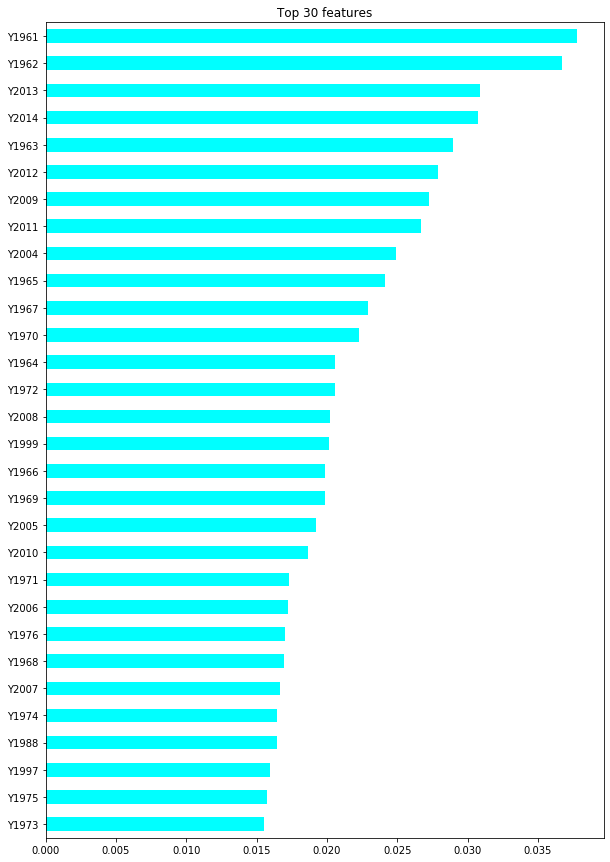

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='Cyan');

In [0]:
column  = 'Y2014'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Y2014: 0.9998290598290598
Validation Accuracy with Y2014: 0.9999145299145299
Drop-Column Importance for Y2014: 8.547008547010737e-05


In [0]:
#BEFORE: Sequence of feature to be permuted
feature = 'Y2014'
X_val[feature].head()

0     27007.0
1     20548.0
2    211636.0
3     69091.0
4     21317.0
Name: Y2014, dtype: float64

In [0]:
#Permutation Importance is a good compromise between Feature Importance based on impurity reduction 
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
X_val_permuted[feature].head()

0       834.0
1    171000.0
2    424724.0
3      7769.0
4      5763.0
Name: Y2014, dtype: float64

In [0]:
# X_val and X_val permuted have the same features
X_val.columns == X_val_permuted.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [0]:
# score, using the permuted data
pipeline.score(X_val_permuted, y_val)

0.9982051282051282

In [0]:
# Get the permutation importance and print nicely
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation accuracy with {feature}: {score_with}')
print(f'Validation accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation importance: {score_with - score_permuted}')

Validation accuracy with Y2014: 0.9999145299145299
Validation accuracy with Y2014 permuted: 0.9982051282051282
Permutation importance: 0.0017094017094017033


In [0]:
# Rerun the permutation importance process, but for a different feature
feature = 'Y2013'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation accuracy with {feature}: {score_with}')
print(f'Validation accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation importance: {score_with - score_permuted}')

Validation accuracy with Y2013: 0.9999145299145299
Validation accuracy with Y2013 permuted: 0.9964957264957265
Permutation importance: 0.0034188034188034067


In [0]:
#Permutation Importance: transformers
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

In [0]:
#Calculate permutation importances: rearranges the dimensions of an array in the order specified by the vector dimorder
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [0]:
permuter.feature_importances_

array([9.64102564e-03, 6.15384615e-03, 4.64957265e-03, 2.85470085e-03,
       1.04273504e-03, 8.88888889e-04, 4.61538462e-04, 7.00854701e-04,
       9.91452991e-04, 5.98290598e-04, 4.78632479e-04, 2.73504274e-04,
       4.78632479e-04, 4.27350427e-04, 1.31623932e-03, 4.27350427e-04,
       5.64102564e-04, 2.90598291e-04, 4.27350427e-04, 1.70940171e-04,
       1.36752137e-04, 2.73504274e-04, 5.47008547e-04, 4.27350427e-04,
       7.35042735e-04, 5.47008547e-04, 2.73504274e-04, 3.76068376e-04,
       4.10256410e-04, 9.74358974e-04, 6.32478632e-04, 3.24786325e-04,
       3.93162393e-04, 1.88034188e-04, 1.19658120e-04, 8.54700855e-05,
       4.27350427e-04, 1.70940171e-04, 2.22222222e-04, 3.24786325e-04,
       3.76068376e-04, 2.73504274e-04, 9.05982906e-04, 6.66666667e-04,
       3.76068376e-04, 6.15384615e-04, 1.36752137e-03, 4.44444444e-04,
       7.35042735e-04, 4.95726496e-04, 1.29914530e-03, 1.40170940e-03,
       3.21367521e-03, 1.79487179e-03])

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Y1996    0.000085
Y1995    0.000120
Y1981    0.000137
Y1998    0.000171
Y1980    0.000171
Y1994    0.000188
Y1999    0.000222
Y1972    0.000274
Y2002    0.000274
Y1982    0.000274
Y1987    0.000274
Y1978    0.000291
Y2000    0.000325
Y1992    0.000325
Y2001    0.000376
Y2005    0.000376
Y1988    0.000376
Y1993    0.000393
Y1989    0.000410
Y1974    0.000427
Y1976    0.000427
Y1979    0.000427
Y1997    0.000427
Y1984    0.000427
Y2008    0.000444
Y1967    0.000462
Y1971    0.000479
Y1973    0.000479
Y2010    0.000496
Y1986    0.000547
Y1983    0.000547
Y1977    0.000564
Y1970    0.000598
Y2006    0.000615
Y1991    0.000632
Y2004    0.000667
Y1968    0.000701
Y1985    0.000735
Y2009    0.000735
Y1966    0.000889
Y2003    0.000906
Y1990    0.000974
Y1969    0.000991
Y1965    0.001043
Y2011    0.001299
Y1975    0.001316
Y2007    0.001368
Y2012    0.001402
Y2014    0.001795
Y1964    0.002855
Y2013    0.003214
Y1963    0.004650
Y1962    0.006154
Y1961    0.009641
dtype: float64

In [0]:
#Display Permutation Importances
eli5.show_weights(
    permuter,
    top=None, #show permutation importances for all features
    feature_names=feature_names #List
)

Weight,Feature
0.0096 ± 0.0007,Y1961
0.0062 ± 0.0004,Y1962
0.0046 ± 0.0007,Y1963
0.0032 ± 0.0007,Y2013
0.0029 ± 0.0008,Y1964
0.0018 ± 0.0007,Y2014
0.0014 ± 0.0004,Y2012
0.0014 ± 0.0005,Y2007
0.0013 ± 0.0003,Y1975
0.0013 ± 0.0004,Y2011


In [0]:
#RThe model trains faster and the score does not decrease.
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9999145299145299


In [0]:
# You could try something like this to remove more features if you want:
permuter.feature_importances_ - permuter.feature_importances_std_ > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [0]:
#XGBoost is one of the most popular machine learning algorithm these days. 
#Regardless of the type of prediction task at hand; regression or classification.
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
       

In [0]:
# The score will be worse.
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7356410256410256


In [0]:
# fit_transfom on train, transform on val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000,  # <= 1000 trees, depends on early stopping
    max_depth=7,        # try deeper trees because of high cardinality categoricals
    learning_rate=0.5,  # try higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='merror', 
          early_stopping_rounds=50) # Stop if the score hasn't improved in 50 rounds

[0]	validation_0-merror:0.240342	validation_1-merror:0.240342
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.226068	validation_1-merror:0.226068
[2]	validation_0-merror:0.216496	validation_1-merror:0.216496
[3]	validation_0-merror:0.208803	validation_1-merror:0.208803
[4]	validation_0-merror:0.197607	validation_1-merror:0.197607
[5]	validation_0-merror:0.190855	validation_1-merror:0.190855
[6]	validation_0-merror:0.183419	validation_1-merror:0.183419
[7]	validation_0-merror:0.176752	validation_1-merror:0.176752
[8]	validation_0-merror:0.168376	validation_1-merror:0.168376
[9]	validation_0-merror:0.166581	validation_1-merror:0.166581
[10]	validation_0-merror:0.162393	validation_1-merror:0.162393
[11]	validation_0-merror:0.158376	validation_1-merror:0.158376
[12]	validation_0-merror:0.154359	validation_1-merror:0.154359
[13]	validation_0-merror:0.1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#Visualization Model

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


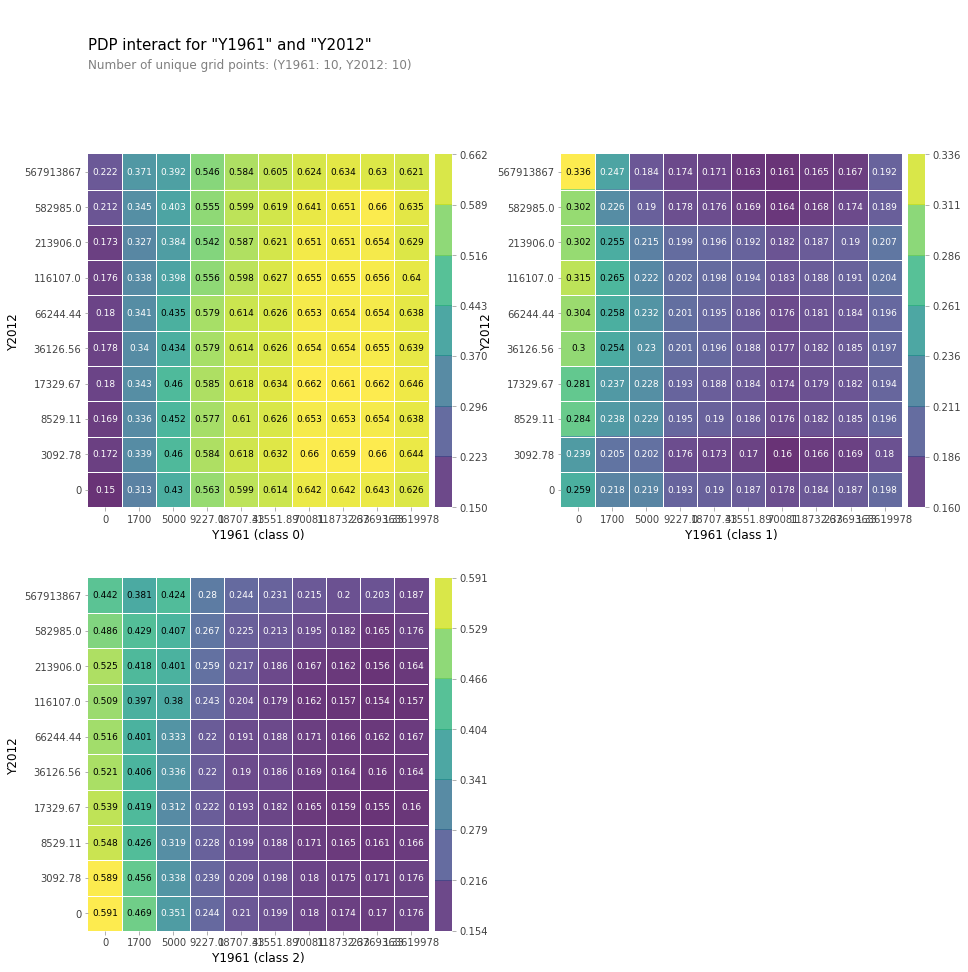

In [0]:
#Partial Dependence Plots PDP
#Years in which agricultural products threw more Yield
features = ['Y1961', 'Y2012']

interaction = pdp_interact(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

#Decision Tree Classifier & Visualization:

In [0]:
from sklearn.tree import DecisionTreeClassifier

#The model  DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=80)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Train Accuracy 0.9999145299145299
Validation Accuracy 0.9999145299145299


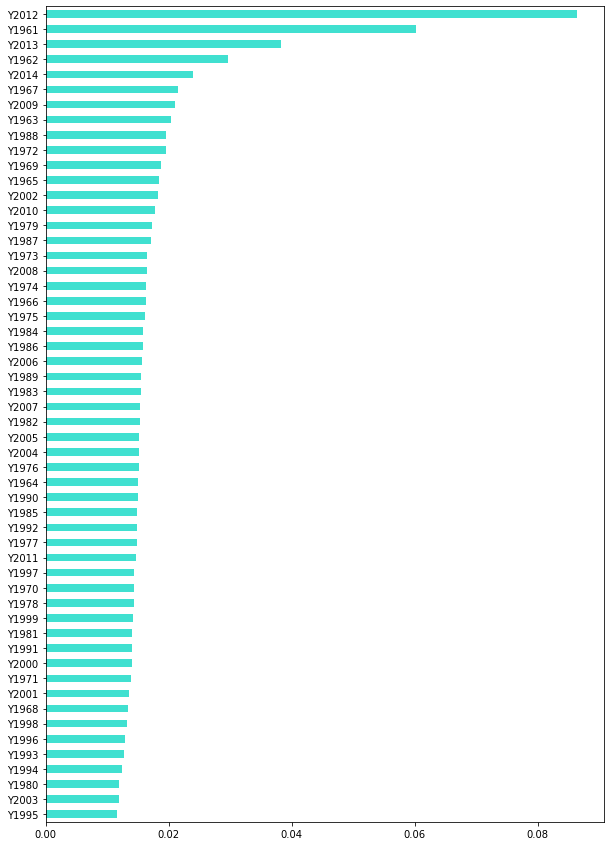

In [0]:
#trees have "feature importances"
import matplotlib.pyplot as plt

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,15))
importances.sort_values().plot.barh(color='turquoise')

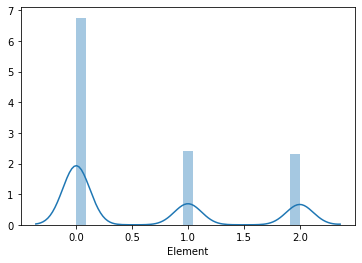

In [0]:
#Agriculture principal Elements: Yield, Area harvested & Production
%matplotlib inline
import seaborn as sns
sns.distplot(df['Element']);

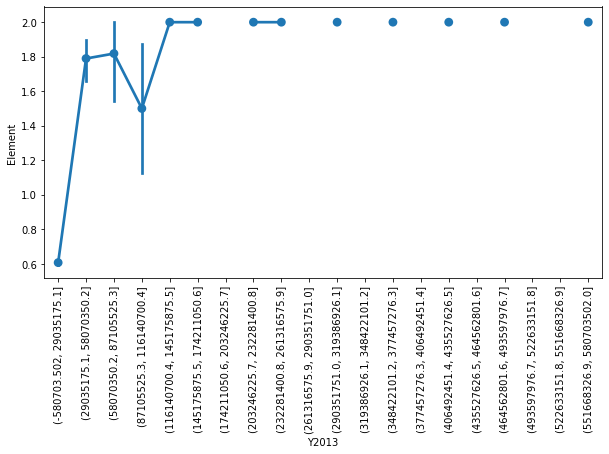

In [0]:
#2013 is other years with the most yield in the agriculture
plt.figure(figsize=(10,5))
sns.pointplot(x=pd.cut(train['Y2013'], bins=20),
                       y=train['Element'])
plt.xticks(rotation=90);                         

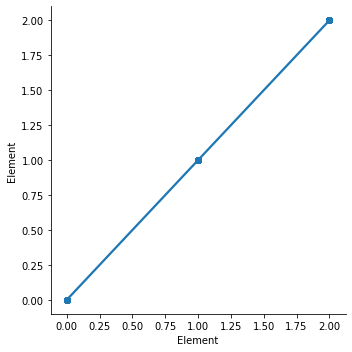

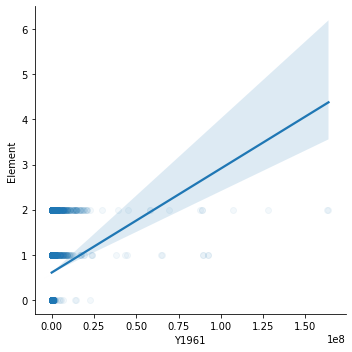

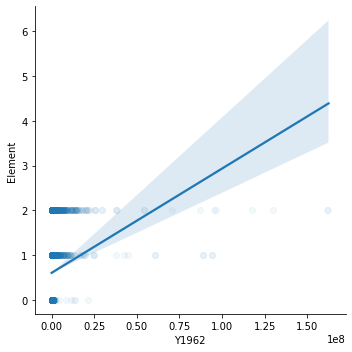

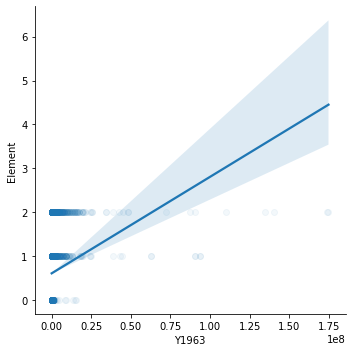

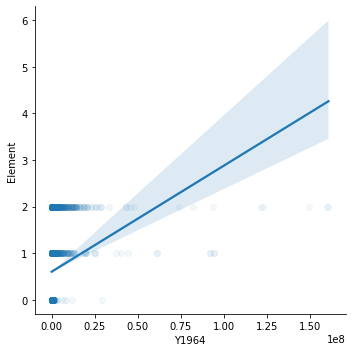

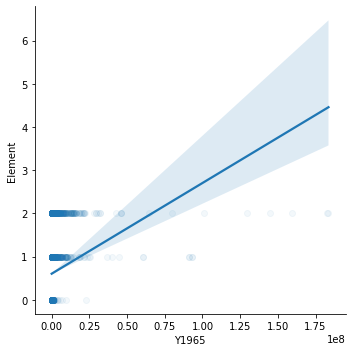

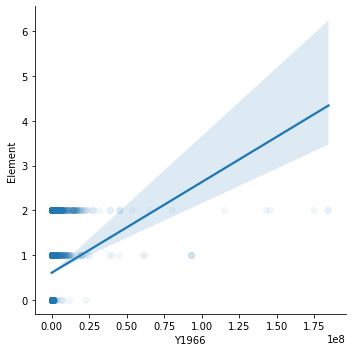

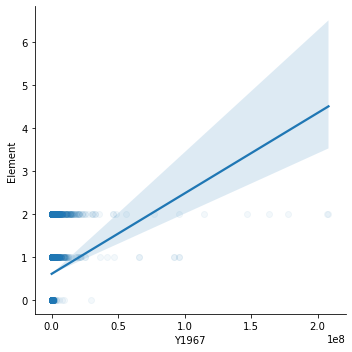

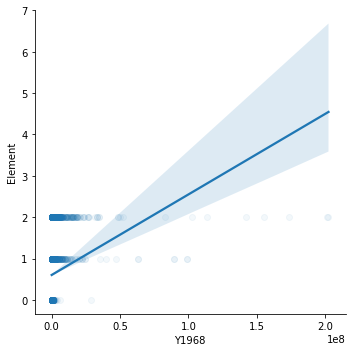

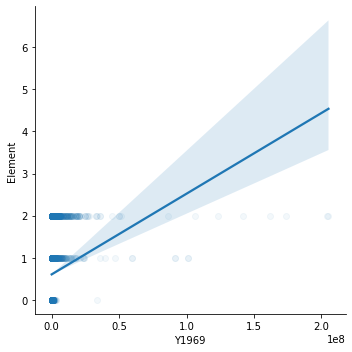

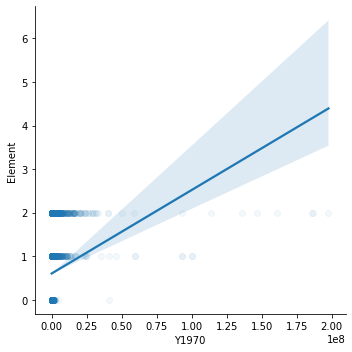

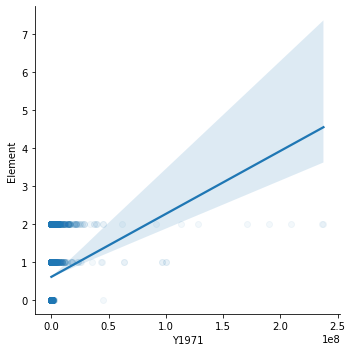

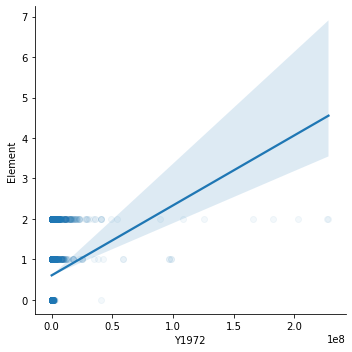

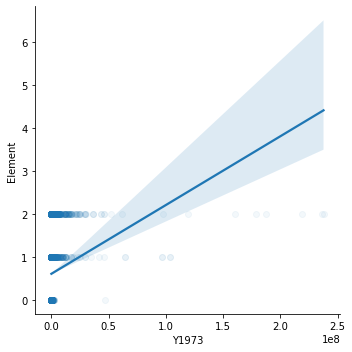

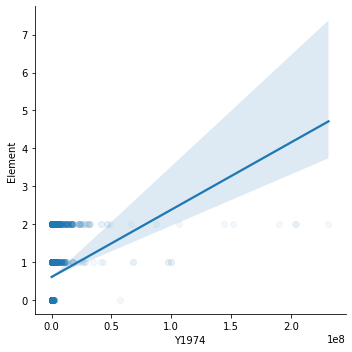

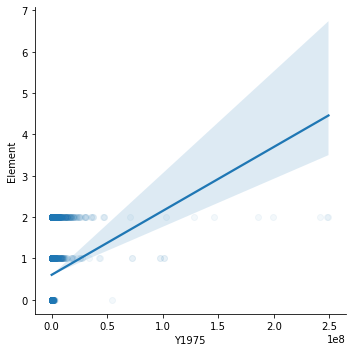

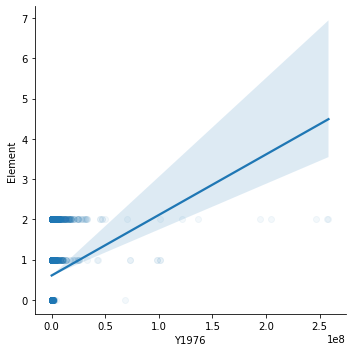

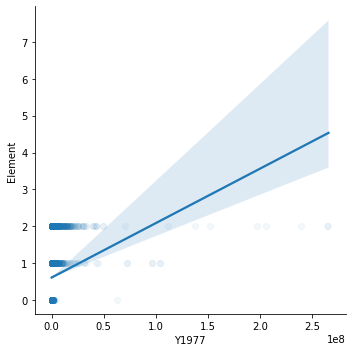

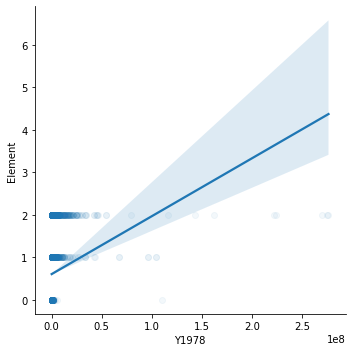

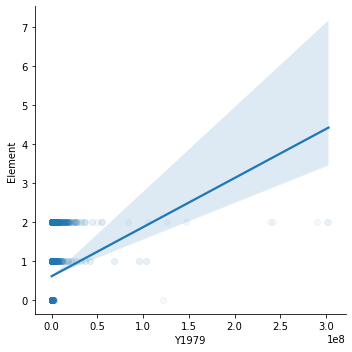

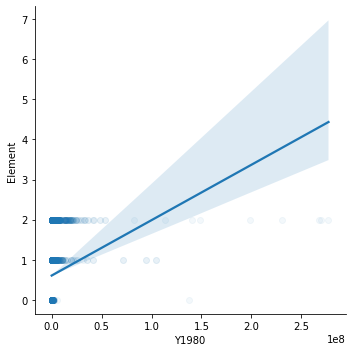

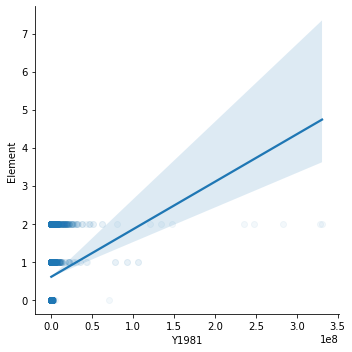

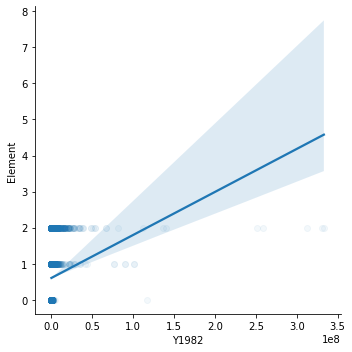

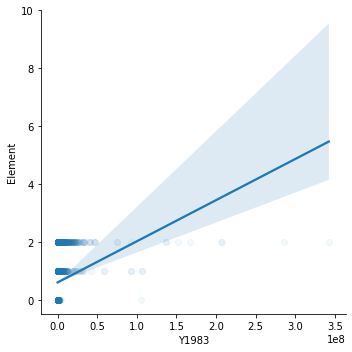

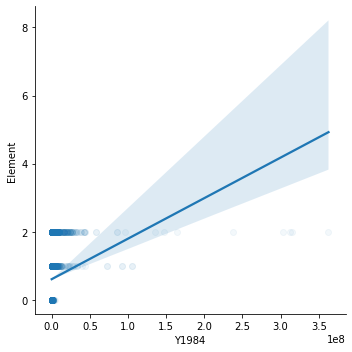

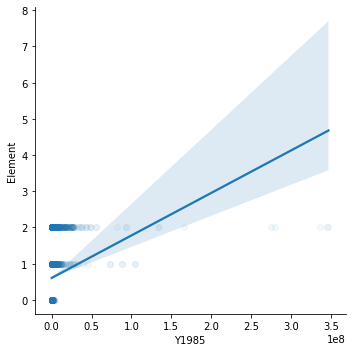

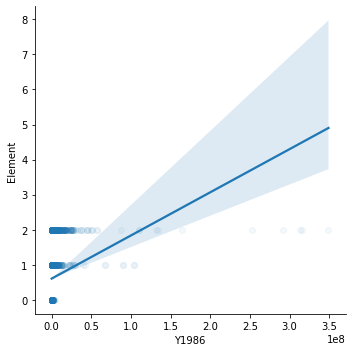

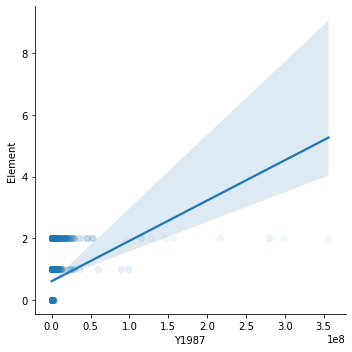

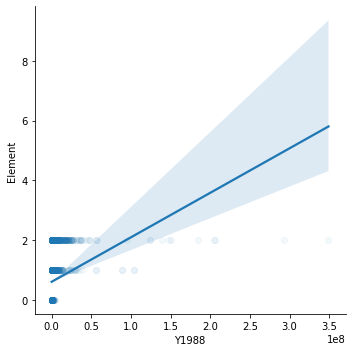

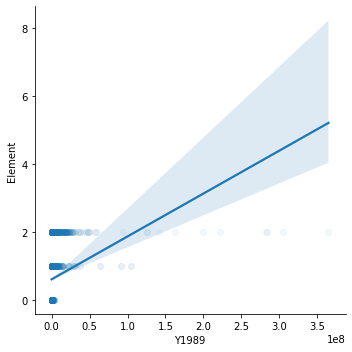

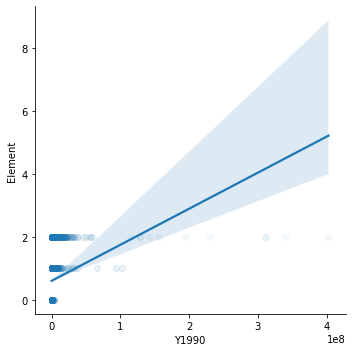

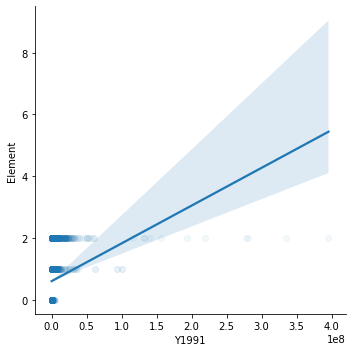

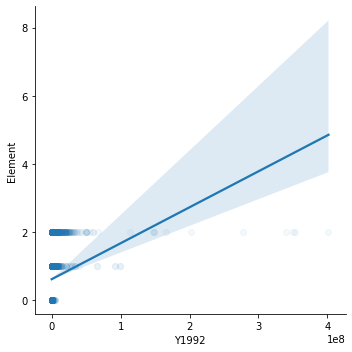

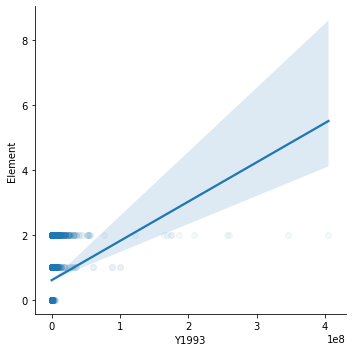

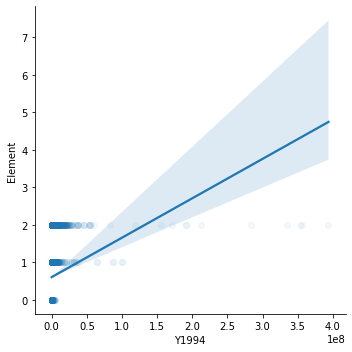

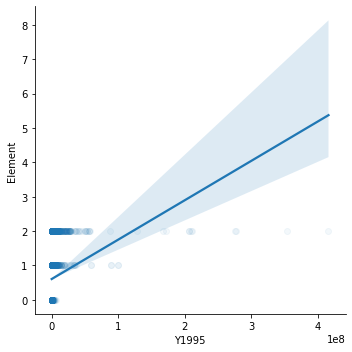

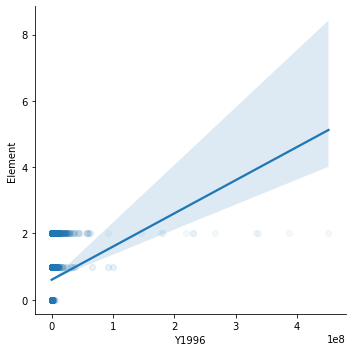

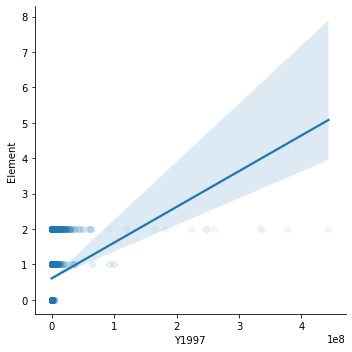

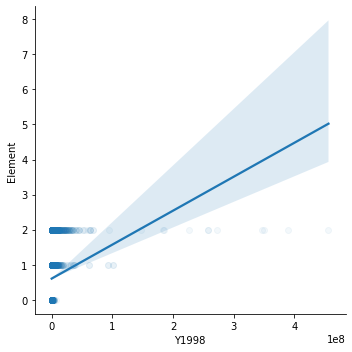

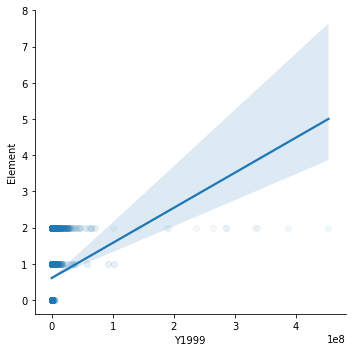

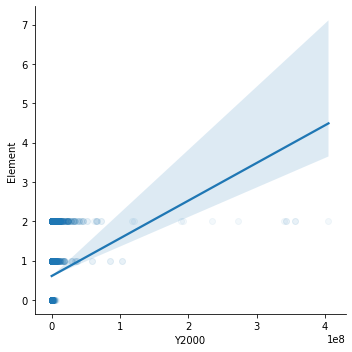

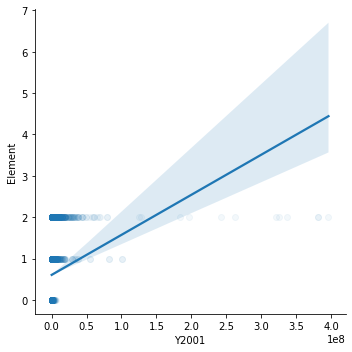

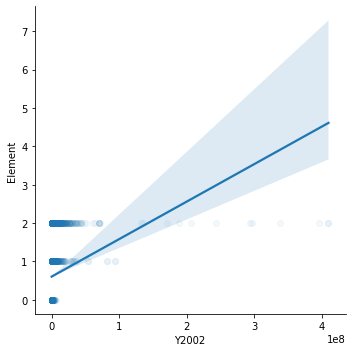

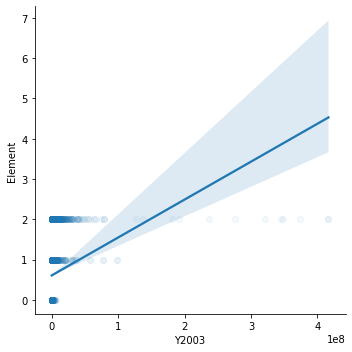

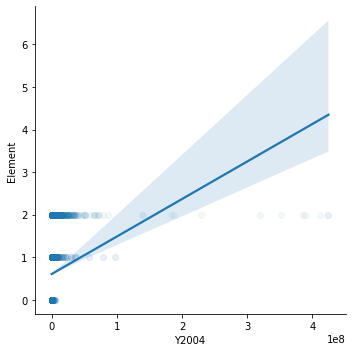

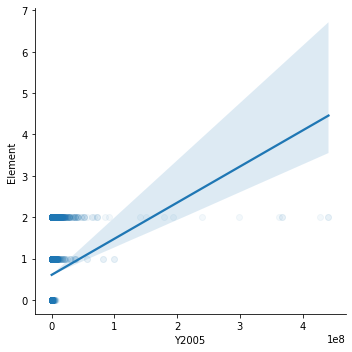

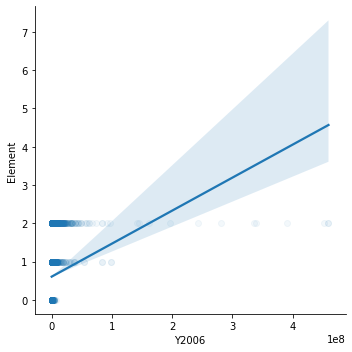

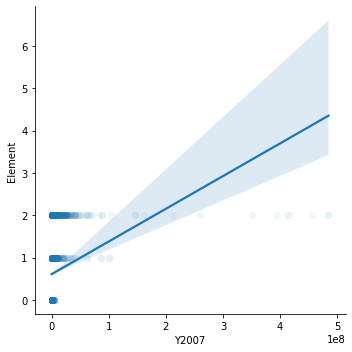

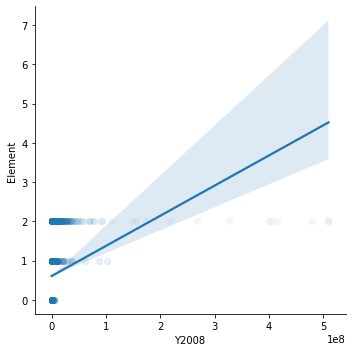

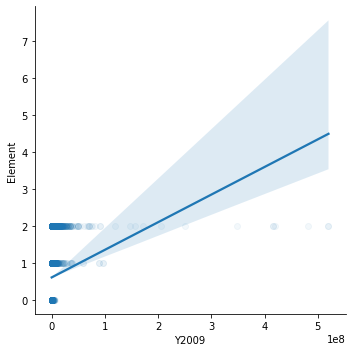

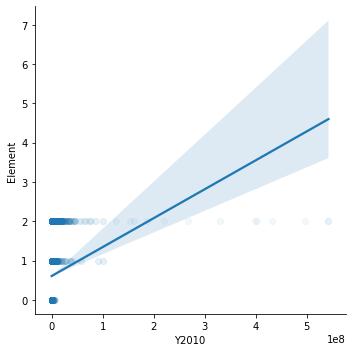

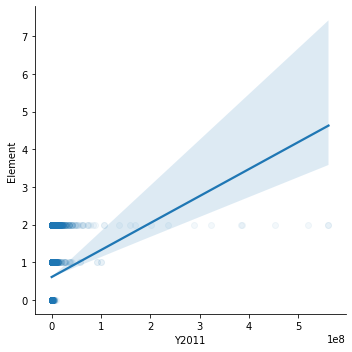

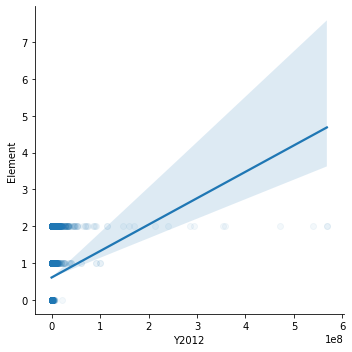

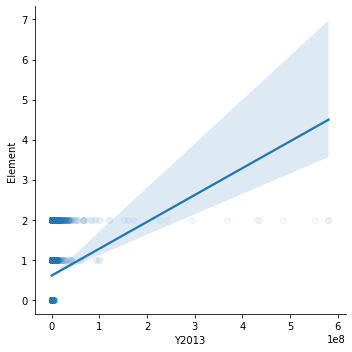

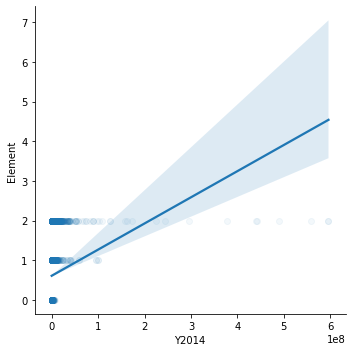

In [0]:
#Graphic Yield, production and Year in the Banana Yield
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='Element', data=train, scatter_kws=dict(alpha=0.05))
    plt.show()

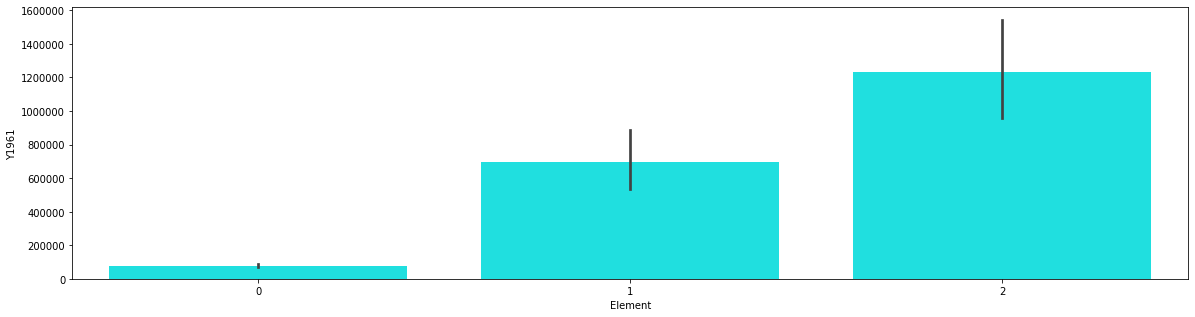

In [0]:
#Agriculture principal Elements: Yield, Area harvested & Production
import seaborn as sns
plt.figure(figsize=(20,5))
sns.barplot(x='Element', y='Y1961', data=train, color='Cyan');

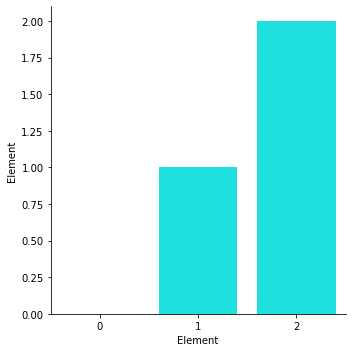

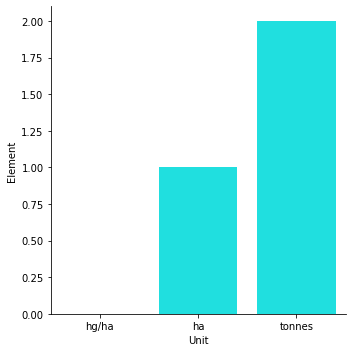

In [0]:
#the graphic that shows how the banana industry has been for decades the least growing.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for col in sorted(train.columns):
    if train[col].nunique() < 30:
        try:
            sns.catplot(x=col, y='Element', data=train, kind='bar', color='Cyan')
            plt.show()
        except:
            pass

In [0]:
#Scatter plot at the relationship between 1 feature and the target
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x='Y2014',
    y='Element',
    title='Agriculture-Crop-Production',
    trendline='ols', #Ordinary Least Squares
)

In [0]:
#Multiple Regression
px.scatter_3d(
    train,
    x='Y2012',
    y='Item',
    z='Y1961',
    title='Agriculture-Crop-Production'
)

In [0]:
px.scatter_3d(df, x='Element', y='Item', z='Area', opacity=0.05)

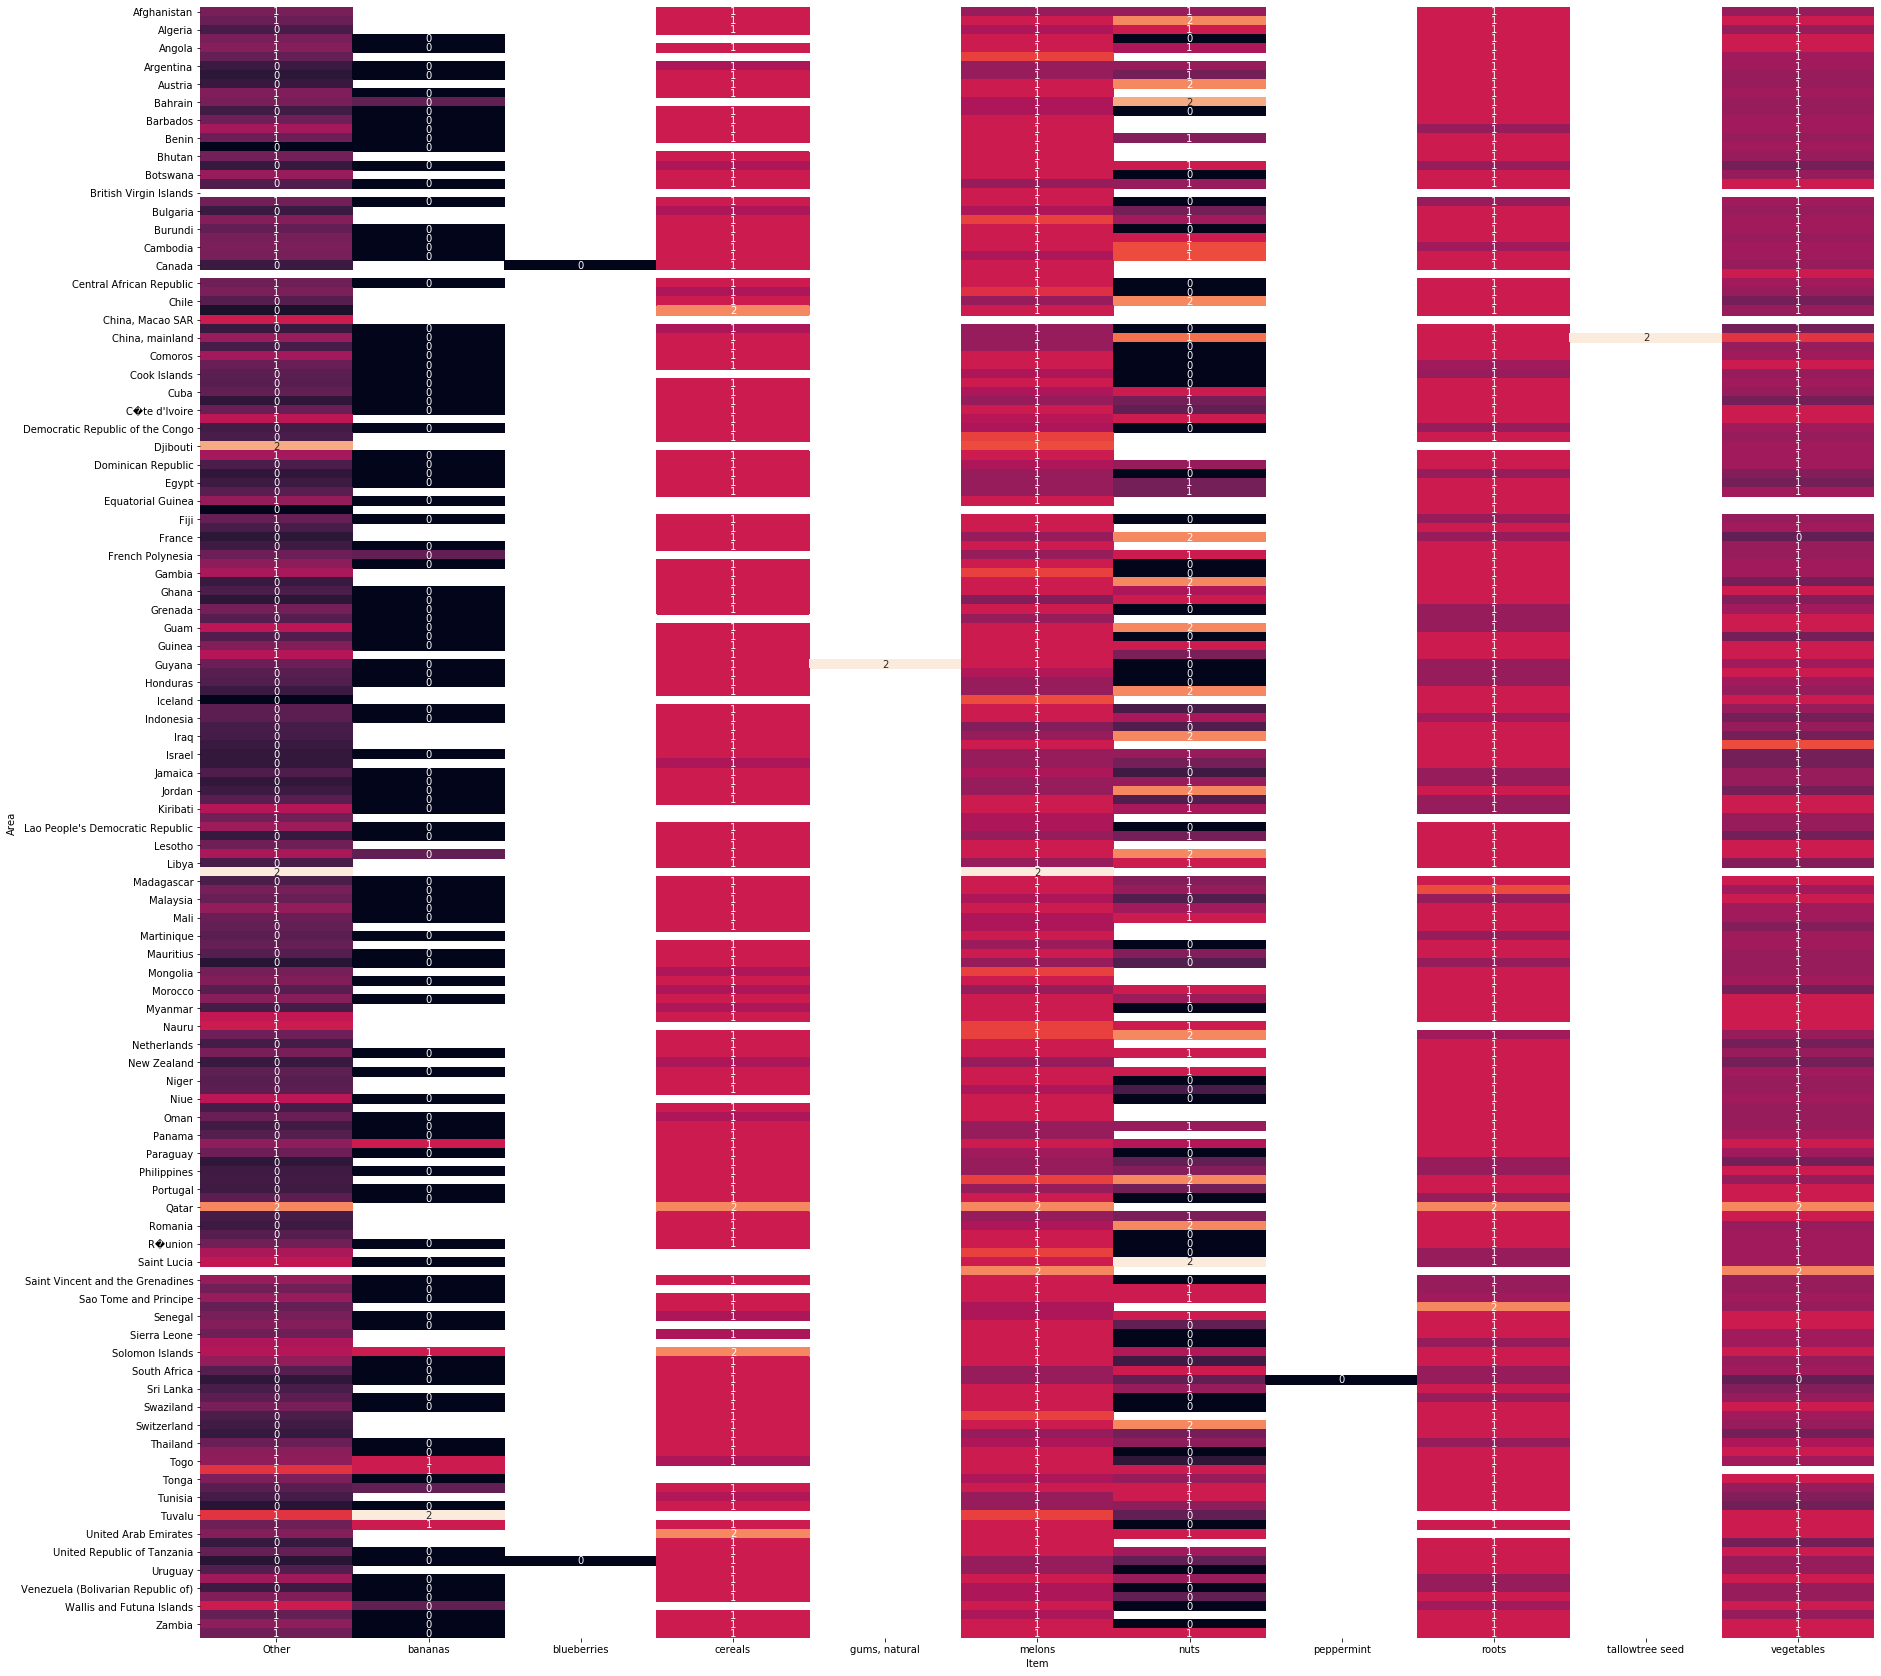

In [0]:
table = df.pivot_table('Element', 'Area', 'Item')
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(table, annot=True, fmt=',.0f', cbar=False);

#Lineal Regression Analysis

"Logistic regression is the linear regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all linear regressions the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more continuous-level (interval or ratio scale) independent variables".

In [0]:
# Get mean baseline
print('Mean Baseline (using 1 features)')
guess = y_train.mean()
print(guess)

Mean Baseline (using 1 features)
0.6143589743589744


In [0]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (1961-2014 Element): {mae:.2f} percentage points')

Train Error (1961-2014 Element): 0.72 percentage points


In [0]:
#Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (1961-2014 Element): {mae:.2f} percentage points')

Test Error (1961-2014 Element): 0.72 percentage points


In [0]:
#Linear Regression
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)


lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.053015750235744896


#Gradient Boosting Model

In [0]:
#XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.4933116668056956


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Y2012'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


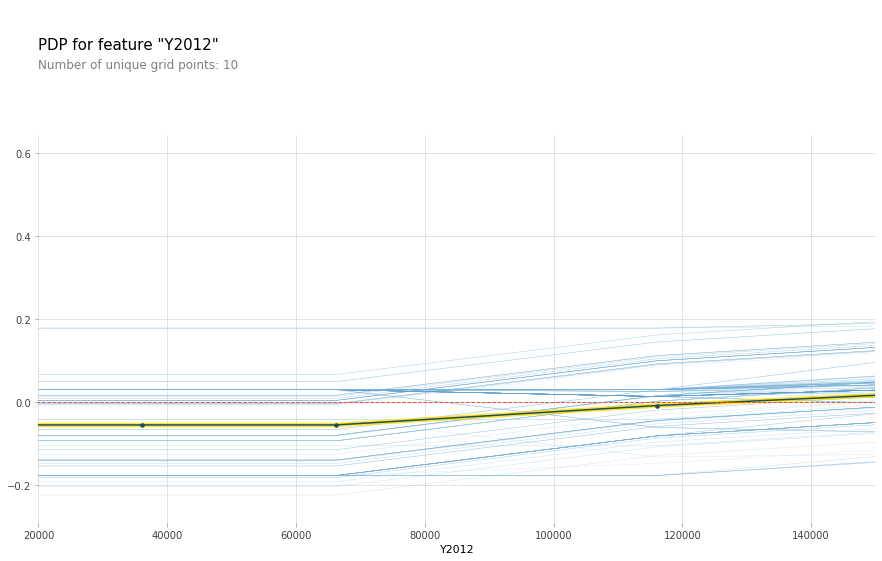

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, 
         frac_to_plot=0.01)

plt.xlim(20000,150000);

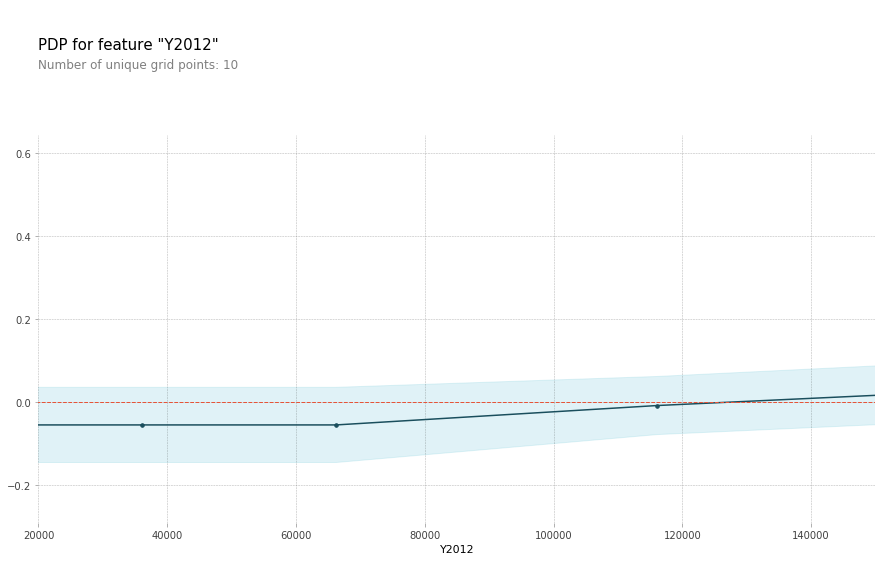

In [0]:
pdp_plot(isolated, feature_name=feature)
plt.xlim((20000,150000));